In [1]:
###### import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')

# training_data = pd.read_csv("input/train.csv.zip", encoding="ISO-8859-1")
# testing_data = pd.read_csv("input/test.csv.zip", encoding="ISO-8859-1")
# attribute_data = pd.read_csv('input/attributes.csv.zip')
# descriptions = pd.read_csv('input/product_descriptions.csv.zip')


training_data = pd.read_csv("C:\\Users\\vikas\\Desktop\\Home Depot\\train.csv", encoding="ISO-8859-1")
testing_data = pd.read_csv("C:\\Users\\vikas\\Desktop\\Home Depot\\test.csv", encoding="ISO-8859-1")
attribute_data = pd.read_csv("C:\\Users\\vikas\\Desktop\\Home Depot\\attributes.csv")
descriptions = pd.read_csv("C:\\Users\\vikas\\Desktop\\Home Depot\\product_descriptions.csv")

In [2]:
def return_desc(df): 
    return print (df.dtypes),print (df.head(3)) ,print(df.apply(lambda x: [x.unique()])), print(df.apply(lambda x: [len(x.unique())])),print (df.shape)

In [3]:
return_desc(training_data) #Describes train_df , similarly use the function to describe other dfs

id                 int64
product_uid        int64
product_title     object
search_term       object
relevance        float64
dtype: object
   id  product_uid                                      product_title  \
0   2       100001                  Simpson Strong-Tie 12-Gauge Angle   
1   3       100001                  Simpson Strong-Tie 12-Gauge Angle   
2   9       100002  BEHR Premium Textured DeckOver 1-gal. #SC-141 ...   

     search_term  relevance  
0  angle bracket        3.0  
1      l bracket        2.5  
2      deck over        3.0  
id               [[2, 3, 9, 16, 17, 18, 20, 21, 23, 27, 34, 35,...
product_uid      [[100001, 100002, 100005, 100006, 100007, 1000...
product_title    [[Simpson Strong-Tie 12-Gauge Angle, BEHR Prem...
search_term      [[angle bracket, l bracket, deck over, rain sh...
relevance        [[3.0, 2.5, 2.33, 2.67, 2.0, 1.0, 1.67, 1.33, ...
dtype: object
id               [74067]
product_uid      [54667]
product_title    [53489]
search_term      [11795]

(None, None, None, None, None)

In [4]:
print("there are in total {} products ".format(len(training_data.product_title.unique())))
print("there are in total {} search query ".format(len(training_data.search_term.unique())))
print("there are in total {} product_uid".format(len(training_data.product_uid.unique())))

there are in total 53489 products 
there are in total 11795 search query 
there are in total 54667 product_uid


In [5]:
print("there are in total {} products ".format(len(testing_data.product_title.unique())))
print("there are in total {} search query ".format(len(testing_data.search_term.unique())))
print("there are in total {} product_uid".format(len(testing_data.product_uid.unique())))

there are in total 94731 products 
there are in total 22427 search query 
there are in total 97460 product_uid


In [6]:
print("there are in total {} product_uid ".format(len(attribute_data.product_uid.unique())))
print("there are in total {} names ".format(len(attribute_data.name.unique())))
print("there are in total {} values".format(len(attribute_data.value.unique())))

there are in total 86264 product_uid 
there are in total 5411 names 
there are in total 307588 values


In [7]:
print("there are in total {} product_uid ".format(len(descriptions.product_uid.unique())))
print("there are in total {} product_descriptions ".format(len(descriptions.product_description.unique())))

there are in total 124428 product_uid 
there are in total 110128 product_descriptions 


In [8]:
print("Training data Contains numbers\n", training_data.search_term.str.contains("\\d",case=False).value_counts())

Training data Contains numbers
 False    55811
True     18256
Name: search_term, dtype: int64


In [9]:
df_brand = attribute_data[attribute_data.name == "MFG Brand Name"][["product_uid", "value"]].rename(columns={"value": "brand"})
attribute_counts = df_brand.brand.value_counts()
print(attribute_counts)
attribute_counts.sum()


Unbranded                     2954
Hampton Bay                   1723
KOHLER                        1389
Everbilt                      1381
Home Decorators Collection    1275
GE                             987
Prime-Line                     931
Crown Bolt                     878
Delta                          853
DEWALT                         675
Milwaukee                      618
American Standard              592
Philips                        565
Husky                          533
MOEN                           518
Daltile                        491
BEHR Premium Plus Ultra        455
Glacier Bay                    420
Makita                         403
Lithonia Lighting              397
Bosch                          390
Veranda                        389
Ryobi                          385
BEHR Premium Plus              382
RIDGID                         362
Simpson Strong-Tie             362
Hedrix                         337
Progress Lighting              330
MS International    

86185

In [ ]:
attribute_data.head(3)

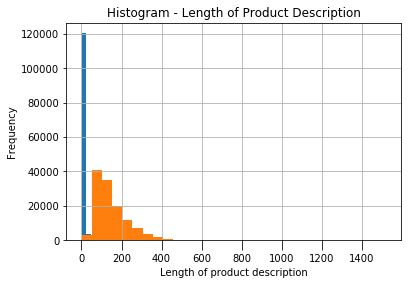

In [13]:
import matplotlib.pyplot as plt
(descriptions.product_description.str.count('\d+') + 1).hist(bins=30)
(descriptions.product_description.str.count('\W')+1).hist(bins=30)
plt.title('Histogram - Length of Product Description')
plt.xlabel('Length of product description')
plt.ylabel('Frequency')
plt.tick_params(axis='x', length=10)
#xlim = axes.get_xlim()
# Limits for the Y axis
#plt.xlim(0,20)
#x_pos = np.arange(len(bars))

# Create names
#plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()


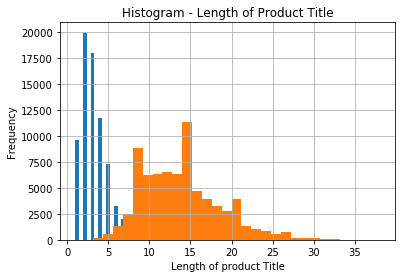

In [14]:
(training_data.product_title.str.count("\\d+") + 1).hist(bins=30)#plot number of digits in title
(training_data.product_title.str.count("\\w+") + 1).hist(bins=30)#plot number of digits in title
plt.title('Histogram - Length of Product Title')
plt.xlabel('Length of product Title')
plt.ylabel('Frequency')
#plt.xlim(0,20)
plt.show()

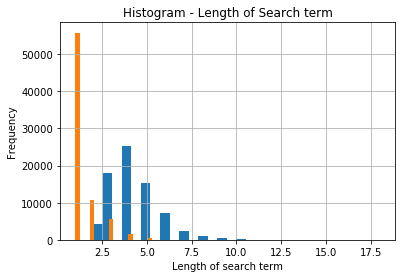

In [15]:
# Now let's get an idea of how many words are in each search_term
# Are people writing really long specific queries or general 
# one word queries?
(training_data.search_term.str.count("\\w+") + 1).hist(bins=30) #plot number of words in search therms
(training_data.search_term.str.count("\\d+") + 1).hist(bins=30) #plot number of digits in search terms
plt.title('Histogram - Length of Search term')
plt.xlabel('Length of search term')
plt.ylabel('Frequency')
plt.show()

3.00    19125
2.33    16060
2.67    15202
2.00    11730
1.67     6780
1.33     3006
1.00     2105
2.50       19
2.25       11
2.75       11
1.75        9
1.50        5
1.25        4
Name: relevance, dtype: int64

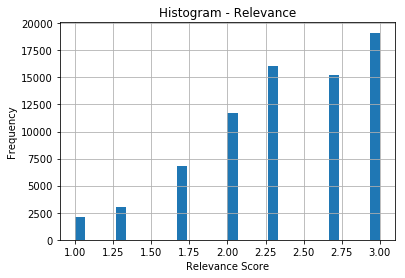

In [16]:
(training_data.relevance ).hist(bins=30)
plt.title('Histogram - Relevance')
plt.xlabel('Relevance Score')
plt.ylabel('Frequency')
training_data.relevance.value_counts()

C:\Users\vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


NameError: name 'np' is not defined

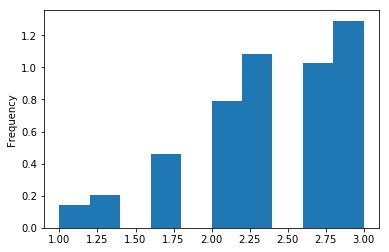

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm  

training_data.relevance.plot(kind='hist', normed=True)

mu, std = norm.fit(training_data.relevance)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('Relevance Score')
plt.show()

In [18]:
print('total data has html tags in',descriptions.product_description.str.count('<br$').values.sum())

total data has html tags in 173


In [19]:
descriptions.product_description.str.contains("Click here to review our return policy for additional information regarding returns").values.sum()

173

In [20]:
training_data[training_data.search_term.str.contains("^\\d+ . \\d+$")].head(10)

id  product_uid                                      product_title  \
3377   10452       101800  Kaleen Habitat Bahama Rose Paprika 4 ft. x 6 f...   
3650   11307       101959  Pressure-Treated Timber #2 Southern Yellow Pin...   
3766   11705       102041  Kaleen Habitat Calypso Azure 4 ft. x 6 ft. Ind...   
4513   14166       102472  Safavieh Lyndhurst Sage/Ivory 4 ft. x 6 ft. Ar...   
7247   22691       104370  Wilsonart 48 in. x 96 in. Laminate Sheet in Mo...   
7485   23405       104575  Yosemite Home Decor Undermount Stainless Steel...   
13639  42190       110172                   Sigman 20 ft. x 20 ft. Blue Tarp   
15523  47882       112008  Wilsonart 48 in. x 96 in. Laminate Sheet in Su...   
21335  65959       118174        1 in. Depth EZ Flow Heavy Duty (Case of 12)   
23618  72613       120571  Honeywell 1 in. Allergen Superior Pleated FPR ...   

      search_term  relevance  
3377        4 x 6       2.00  
3650        4 x 6       1.67  
3766        4 x 6       3.00  
4513        4 x 6       1.33  
7247      48 x 96       2.33  
7485      23 x 38       2.33  
13639     20 x 20       2.67  
15523     48 x 96       3.00  
21335     20 x 20       1.67  
23618     20 x 20       1.67

In [21]:
training_data[training_data.product_uid==100030]

id  product_uid                                   product_title  \
44  164       100030  9.1 in. x 5.8 in. White Designer Shelf Bracket   
45  165       100030  9.1 in. x 5.8 in. White Designer Shelf Bracket   
46  166       100030  9.1 in. x 5.8 in. White Designer Shelf Bracket   

       search_term  relevance  
44  8 4616809045 9       1.67  
45   shelf bracket       3.00  
46  white 4shelves       1.67

In [22]:
# This shows us that ~86,000 product descriptions include the brand
# name, ~41,000 include the color family, etc.  What are the values
# of these variables that come up the most often?

import collections
def summarize_values(name, values):
    values.fillna("", inplace=True)
    counts = collections.Counter()
    for value in values:
        counts[value.lower()] += 1
    
    total = sum(counts.values())
    print("{} counts ({:,} values)".format(name, total))
    for word, count in counts.most_common(20):
        print("{}: {:.1f}% ({:,})".format(word, 100. * count / total, count))

for attribute_name in ["Color Family", "Color/Finish", "Material", "MFG Brand Name", "Indoor/Outdoor", "Commercial / Residential"]:
    summarize_values("\n" + attribute_name, attribute_data[attribute_data.name == attribute_name].value)

C:\Users\vikas\Anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)



Color Family counts (41,508 values)
white: 15.8% (6,546)
black: 7.5% (3,115)
brown: 5.6% (2,339)
gray: 4.6% (1,892)
whites: 4.4% (1,829)
chrome: 3.9% (1,616)
browns / tans: 3.5% (1,463)
red: 3.0% (1,239)
blacks: 3.0% (1,237)
bronze: 2.8% (1,151)
metallics: 2.6% (1,078)
nickel: 2.5% (1,028)
beige: 2.3% (950)
grays: 2.3% (939)
blue: 2.1% (891)
silver: 2.1% (871)
stainless steel: 2.0% (824)
beige / cream: 1.9% (788)
greens: 1.7% (713)
multi: 1.6% (669)

Color/Finish counts (28,564 values)
white: 14.4% (4,115)
black: 5.7% (1,628)
stainless steel: 3.7% (1,065)
chrome: 3.5% (995)
gray: 1.7% (482)
brushed nickel: 1.7% (473)
oil rubbed bronze: 1.3% (375)
polished chrome: 1.3% (370)
brown: 1.1% (328)
primed white: 1.1% (324)
clear: 1.1% (316)
red: 0.9% (251)
blue: 0.8% (218)
satin nickel: 0.7% (213)
beige: 0.7% (210)
silver: 0.7% (198)
biscuit: 0.7% (196)
almond: 0.7% (187)
stainless: 0.6% (180)
bronze: 0.6% (176)

Material counts (31,500 values)
steel: 13.2% (4,151)
metal: 9.6% (3,029)
plasti

In [23]:
from bs4 import BeautifulSoup
import lxml
import re
import nltk
from nltk.corpus import stopwords # Import the stop word list
from nltk.metrics import edit_distance
from string import punctuation
from collections import Counter


def remove_html_tag(text):
    soup = BeautifulSoup(text, 'lxml')
    text = soup.get_text().replace('Click here to review our return policy for additional information regarding returns', '')
    return text

def str_stemmer(doc):
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return ' '.join(tokens)

def str_stemmer_title(s):
#     return " ".join([stemmer.stem(word) for word in s.lower().split()])
    return " ".join(map(stemmer.stem, s.lower().split()))

def str_common_word(str1, str2):
    whole_set = set(str1.split())
#     return sum(int(str2.find(word)>=0) for word in whole_set)
    return sum(int(str2.find(word)>=0) for word in whole_set)


def get_shared_words(row_data):
    return np.sum([str_common_word(*row_data[:-1]), str_common_word(*row_data[1:])])


In [24]:
has_tag_in = descriptions.product_description.str.contains('<br')
descriptions.loc[has_tag_in, 'product_description'] = descriptions.loc[has_tag_in, 'product_description'].map(lambda x:remove_html_tag(x))

In [25]:
import requests
import re
import time
from random import randint

START_SPELL_CHECK="<span class=\"spell\">Showing results for</span>"
END_SPELL_CHECK="<br><span class=\"spell_orig\">Search instead for"
HTML_Codes = (("'", '&#39;'),('"', '&quot;'),('>', '&gt;'),('<', '&lt;'),('&', '&amp;'))

def spell_check(s):
    q = '+'.join(s.split())
    time.sleep(  randint(0,1) ) #relax and don't let google be angry
    r = requests.get("https://www.google.co.uk/search?q="+q)
    content = r.text
    start=content.find(START_SPELL_CHECK) 
    if ( start > -1 ):
        start = start + len(START_SPELL_CHECK)
        end=content.find(END_SPELL_CHECK)
        search= content[start:end]
        search = re.sub(r'<[^>]+>', '', search)
        for code in HTML_Codes:
            search = search.replace(code[1], code[0])
        search = search[1:]
    else:
        search = s
    return search 

In [26]:
training_data = pd.merge(training_data, descriptions, 
                         on="product_uid", how="left")

In [27]:
print("It has blank/empty fields ",training_data.isnull().values.sum())

It has blank/empty fields  0


In [28]:
print("has blank/empty values",training_data.isnull().values.any())

has blank/empty values False


In [29]:
from nltk.corpus import brown, stopwords
from nltk.cluster.util import cosine_distance
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter


def sentence_similarity(columns,stopwords=None):
    sent1, sent2 = columns[0], columns[1]
    sent1 = sent1.split(' ')
    sent2 = sent2.split(' ')
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
 
    return 1 - cosine_distance(vector1, vector2)

def get_jaccard_sim(columns): 
    str1, str2 = columns[0], columns[1]
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))


def calc_edit_dist(row):
    return edit_distance(*row)


In [30]:
## let's create first the cleaning functions
from bs4 import BeautifulSoup
import lxml
import re
import nltk
from nltk.corpus import stopwords # Import the stop word list
from nltk.metrics import edit_distance
from string import punctuation
from collections import Counter


def remove_html_tag(text):
    soup = BeautifulSoup(text, 'lxml')
    text = soup.get_text().replace('Click here to review our return policy for additional information regarding returns', '')
    return text

def str_stemmer(doc):
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return ' '.join(tokens)


def str_stemmer_tokens(tokens):
    # split into tokens by white space
#     tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return ' '.join(tokens)

def str_stemmer_title(s):
    return " ".join(map(stemmer.stem, s))

def str_common_word(str1, str2):
    whole_set = set(str1.split())
#     return sum(int(str2.find(word)>=0) for word in whole_set)
    return sum(int(str2.find(word)>=0) for word in whole_set)


# def str_common_word(str1, str2):
#     return sum(int(str2.find(word)>=0) for word in str1.split())


def str_common_word2(str1, str2):
    part_of_first = set(str1)
    return sum(1 for word in str2 if word in part_of_first)
#     return sum(int(str2.find(word)>=0) for word in str1.split())

def get_shared_words_mut(row_data):
    return np.sum([str_common_word2(*row_data[:-1]), str_common_word2(*row_data[1:])])


def get_shared_words_imut(row_data):
    return np.sum([str_common_word(*row_data[:-1]), str_common_word2(*row_data[1:])])
    
from nltk.corpus import brown, stopwords
from nltk.cluster.util import cosine_distance
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter


def sentence_similarity(columns,stopwords=None):
    sent1, sent2 = columns[0], columns[1]
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
 
    return 1 - cosine_distance(vector1, vector2)

def get_jaccard_sim(columns): 
    str1, str2 = columns[0], columns[1]
    a = set(str1) 
    b = set(str2)
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [31]:
training_data['search_term_tokens'] = training_data.search_term.str.lower().str.split()
training_data['product_title_tokens'] = training_data.product_title.str.lower().str.split()
training_data['product_description_tokens'] = training_data.product_description.str.lower().str.split()

training_data['search_term'] = [str_stemmer_title(_) for _ in training_data.search_term_tokens.values.tolist()]
training_data['product_title'] = [str_stemmer_tokens(_) for _ in training_data.product_title_tokens.values.tolist()]
training_data['product_description'] = [str_stemmer_tokens(_) for _ in training_data.product_description_tokens.values.tolist()]




In [33]:
import numpy as np
training_data['shared_words_mut'] = [get_shared_words_mut(columns)
                         for columns in 
                         training_data[['search_term_tokens', 'product_title_tokens', 'product_description_tokens']].values.tolist()
                        ]

training_data['shared_words'] = list(map(get_shared_words_imut, training_data[['search_term','product_description', 'product_title']].values))





In [34]:
training_data["edistance_sprot"] = [edit_distance(word1, word2) for word1, word2 in
                                    training_data[["search_term","product_title"]].values.tolist()]


training_data["edistance_sd"] = [edit_distance(word1, word2) for word1, word2 in
                                    training_data[["search_term","product_description"]].values.tolist()]



In [35]:
training_data['j_dis_sqt'] = [get_jaccard_sim(rows) for rows in training_data[["search_term_tokens","product_title_tokens"]].values]
training_data['j_dis_sqd'] = [get_jaccard_sim(rows) for rows in training_data[["search_term_tokens","product_description_tokens"]].values]



In [36]:
training_data['search_query_length'] = training_data.search_term.str.len()
training_data['number_of_words_in_descr'] = training_data.product_description.str.count("\\w+")

In [37]:
training_data['cos_dis_sqt'] = [ sentence_similarity(rows) for rows in training_data[["search_term","product_title"]].values]


In [38]:
training_data['cos_dis_sqd'] = [sentence_similarity(rows) for rows in training_data[["search_term","product_description"]].values]

In [39]:
training_data.head(3)

id  product_uid                                      product_title  \
0   2       100001                            simpson strongtie angle   
1   3       100001                            simpson strongtie angle   
2   9       100002  behr premium textured deckover tugboat wood co...   

    search_term  relevance                                product_description  \
0  angl bracket        3.0  angles make joints stronger also provide consi...   
1     l bracket        2.5  angles make joints stronger also provide consi...   
2     deck over        3.0  behr premium textured deckover innovative soli...   

  search_term_tokens                               product_title_tokens  \
0   [angle, bracket]             [simpson, strong-tie, 12-gauge, angle]   
1       [l, bracket]             [simpson, strong-tie, 12-gauge, angle]   
2       [deck, over]  [behr, premium, textured, deckover, 1-gal., #s...   

                          product_description_tokens  shared_words_mut  \
0  [not, only, do, angles, make, joints, stronger...                 4   
1  [not, only, do, angles, make, joints, stronger...                 3   
2  [behr, premium, textured, deckover, is, an, in...                21   

   shared_words  edistance_sprot  edistance_sd  j_dis_sqt  j_dis_sqd  \
0            24               20           589        0.2        0.0   
1            24               20           592        0.0        0.0   
2            62               53           850        0.0        0.0   

   search_query_length  number_of_words_in_descr  cos_dis_sqt  cos_dis_sqd  
0                   12                        71     0.584761     0.667018  
1                    9                        71     0.437595     0.635434  
2                    9                       111     0.783244     0.700815

In [40]:
testing_data = pd.merge(testing_data, descriptions, 
                         on="product_uid", how="left")
print("has blank/empty values",testing_data.isnull().values.any())


has blank/empty values False


In [41]:
testing_data['search_term_tokens'] = testing_data.search_term.str.lower().str.split()
testing_data['product_title_tokens'] = testing_data.product_title.str.lower().str.split()
testing_data['product_description_tokens'] = testing_data.product_description.str.lower().str.split()

In [42]:
testing_data['search_term'] = [str_stemmer_title(_) for _ in testing_data.search_term_tokens.values.tolist()]
testing_data['product_title'] = [str_stemmer_tokens(_) for _ in testing_data.product_title_tokens.values.tolist()]
testing_data['product_description'] = [str_stemmer_tokens(_) for _ in testing_data.product_description_tokens.values.tolist()]


In [43]:
testing_data['shared_words_mut'] = [get_shared_words_mut(columns)
                         for columns in 
                         testing_data[['search_term_tokens', 'product_title_tokens', 'product_description_tokens']].values.tolist()
                        ]

In [44]:
testing_data['shared_words'] = list(map(get_shared_words_imut, testing_data[['search_term','product_description', 'product_title']].values))


In [45]:
testing_data["edistance_sprot"] = [edit_distance(word1, word2) for word1, word2 in
                                    testing_data[["search_term","product_title"]].values.tolist()]


testing_data["edistance_sd"] = [edit_distance(word1, word2) for word1, word2 in
                                    testing_data[["search_term","product_description"]].values.tolist()]

In [46]:
testing_data['j_dis_sqt'] = [get_jaccard_sim(rows) for rows in testing_data[["search_term_tokens","product_title_tokens"]].values]
testing_data['j_dis_sqd'] = [get_jaccard_sim(rows) for rows in testing_data[["search_term_tokens","product_description_tokens"]].values]


In [47]:
testing_data['search_query_length'] = testing_data.search_term.str.len()
testing_data['number_of_words_in_descr'] = testing_data.product_description.str.count("\\w+")



In [48]:
testing_data['cos_dis_sqt'] = [ sentence_similarity(rows) for rows in testing_data[["search_term","product_title"]].values]
testing_data['cos_dis_sqd'] = [sentence_similarity(rows) for rows in testing_data[["search_term","product_description"]].values]

In [49]:
testing_data.corr()

id  product_uid  shared_words_mut  \
id                        1.000000     0.984240         -0.050582   
product_uid               0.984240     1.000000         -0.052677   
shared_words_mut         -0.050582    -0.052677          1.000000   
shared_words              0.034211     0.029510          0.488065   
edistance_sprot           0.010379     0.008628          0.440293   
edistance_sd             -0.092211    -0.088199          0.595897   
j_dis_sqt                 0.122488     0.116859          0.034358   
j_dis_sqd                 0.073183     0.065450          0.019210   
search_query_length       0.064054     0.051154          0.162048   
number_of_words_in_descr -0.090713    -0.086828          0.608730   
cos_dis_sqt               0.078321     0.068873          0.119524   
cos_dis_sqd               0.028857     0.020203          0.142095   

                          shared_words  edistance_sprot  edistance_sd  \
id                            0.034211         0.010379     -0.092211   
product_uid                   0.029510         0.008628     -0.088199   
shared_words_mut              0.488065         0.440293      0.595897   
shared_words                  1.000000         0.951519      0.356283   
edistance_sprot               0.951519         1.000000      0.331344   
edistance_sd                  0.356283         0.331344      1.000000   
j_dis_sqt                    -0.086580        -0.249274     -0.042000   
j_dis_sqd                    -0.044080        -0.172710     -0.304889   
search_query_length           0.219032         0.000338      0.094522   
number_of_words_in_descr      0.347420         0.320064      0.993625   
cos_dis_sqt                   0.153782        -0.067162      0.044520   
cos_dis_sqd                   0.162426        -0.032969      0.056700   

                          j_dis_sqt  j_dis_sqd  search_query_length  \
id                         0.122488   0.073183             0.064054   
product_uid                0.116859   0.065450             0.051154   
shared_words_mut           0.034358   0.019210             0.162048   
shared_words              -0.086580  -0.044080             0.219032   
edistance_sprot           -0.249274  -0.172710             0.000338   
edistance_sd              -0.042000  -0.304889             0.094522   
j_dis_sqt                  1.000000   0.507038             0.295854   
j_dis_sqd                  0.507038   1.000000             0.332012   
search_query_length        0.295854   0.332012             1.000000   
number_of_words_in_descr  -0.035548  -0.295673             0.102122   
cos_dis_sqt                0.422333   0.322405             0.542840   
cos_dis_sqd                0.260100   0.311699             0.628685   

                          number_of_words_in_descr  cos_dis_sqt  cos_dis_sqd  
id                                       -0.090713     0.078321     0.028857  
product_uid                              -0.086828     0.068873     0.020203  
shared_words_mut                          0.608730     0.119524     0.142095  
shared_words                              0.347420     0.153782     0.162426  
edistance_sprot                           0.320064    -0.067162    -0.032969  
edistance_sd                              0.993625     0.044520     0.056700  
j_dis_sqt                                -0.035548     0.422333     0.260100  
j_dis_sqd                                -0.295673     0.322405     0.311699  
search_query_length                       0.102122     0.542840     0.628685  
number_of_words_in_descr                  1.000000     0.053292     0.068046  
cos_dis_sqt                               0.053292     1.000000     0.813355  
cos_dis_sqd                               0.068046     0.813355     1.000000

In [50]:
training_data.describe()


id    product_uid     relevance  shared_words_mut  \
count   74067.000000   74067.000000  74067.000000      74067.000000   
mean   112385.709223  142331.911553      2.381634         16.632724   
std     64016.573650   30770.774864      0.533984         10.675546   
min         2.000000  100001.000000      1.000000          0.000000   
25%     57163.500000  115128.500000      2.000000          9.000000   
50%    113228.000000  137334.000000      2.330000         14.000000   
75%    168275.500000  166883.500000      3.000000         21.000000   
max    221473.000000  206650.000000      3.000000        164.000000   

       shared_words  edistance_sprot  edistance_sd     j_dis_sqt  \
count  74067.000000     74067.000000  74067.000000  74067.000000   
mean      55.249976        41.286943    654.650074      0.133894   
std       19.058694        17.213916    379.712388      0.104349   
min        6.000000         0.000000     73.000000      0.000000   
25%       41.000000        28.000000    384.000000      0.066667   
50%       53.000000        39.000000    559.000000      0.117647   
75%       68.000000        52.000000    819.000000      0.190476   
max      125.000000       111.000000   4419.000000      1.000000   

          j_dis_sqd  search_query_length  number_of_words_in_descr  \
count  74067.000000         74067.000000              74067.000000   
mean       0.018396            17.606734                 84.404337   
std        0.015997             7.231461                 48.720113   
min        0.000000             2.000000                 13.000000   
25%        0.007874            12.000000                 50.000000   
50%        0.015625            17.000000                 72.000000   
75%        0.025641            22.000000                105.000000   
max        0.190476            59.000000                562.000000   

        cos_dis_sqt   cos_dis_sqd  
count  74067.000000  74067.000000  
mean       0.750231      0.725384  
std        0.135662      0.128294  
min        0.000000      0.000000  
25%        0.687111      0.666166  
50%        0.779008      0.751104  
75%        0.845656      0.815402  
max        1.000000      0.971390

In [51]:
testing_data.describe()


id    product_uid  shared_words_mut   shared_words  \
count  166693.000000  166693.000000     166693.000000  166693.000000   
mean   123932.839741  149713.170445         16.611729      54.856743   
std     71518.389174   37270.476881         10.767395      19.097372   
min         1.000000  100001.000000          0.000000       3.000000   
25%     61669.000000  116665.000000          9.000000      41.000000   
50%    124004.000000  142445.000000         14.000000      53.000000   
75%    187036.000000  179444.000000         21.000000      67.000000   
max    240760.000000  224428.000000        162.000000     128.000000   

       edistance_sprot   edistance_sd      j_dis_sqt      j_dis_sqd  \
count    166693.000000  166693.000000  166693.000000  166693.000000   
mean         41.398409     657.246981       0.132491       0.017771   
std          17.382519     376.788164       0.105038       0.015581   
min           0.000000      22.000000       0.000000       0.000000   
25%          29.000000     386.000000       0.066667       0.007246   
50%          39.000000     561.000000       0.117647       0.014925   
75%          52.000000     827.000000       0.187500       0.025316   
max         114.000000    4251.000000       1.000000       0.200000   

       search_query_length  number_of_words_in_descr    cos_dis_sqt  \
count        166693.000000             166693.000000  166693.000000   
mean             16.499079                 84.652097       0.740166   
std               7.099329                 48.373132       0.138944   
min               1.000000                  1.000000       0.000000   
25%              11.000000                 50.000000       0.672976   
50%              16.000000                 72.000000       0.769058   
75%              21.000000                106.000000       0.838512   
max              60.000000                553.000000       1.000000   

         cos_dis_sqd  
count  166693.000000  
mean        0.712677  
std         0.132597  
min         0.000000  
25%         0.649393  
50%         0.738709  
75%         0.806693  
max         0.974223

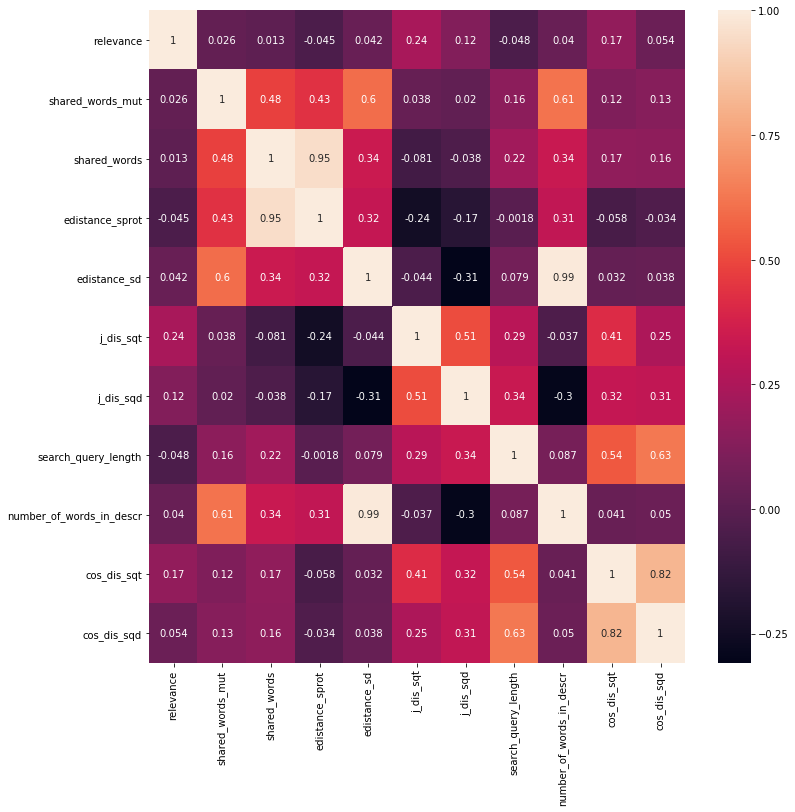

In [52]:
import seaborn as sns
plt.figure(figsize=(12, 12))
temp = training_data.drop(['product_uid','id'],axis=1)
sns.heatmap(temp.corr(), annot=True)
plt.show()

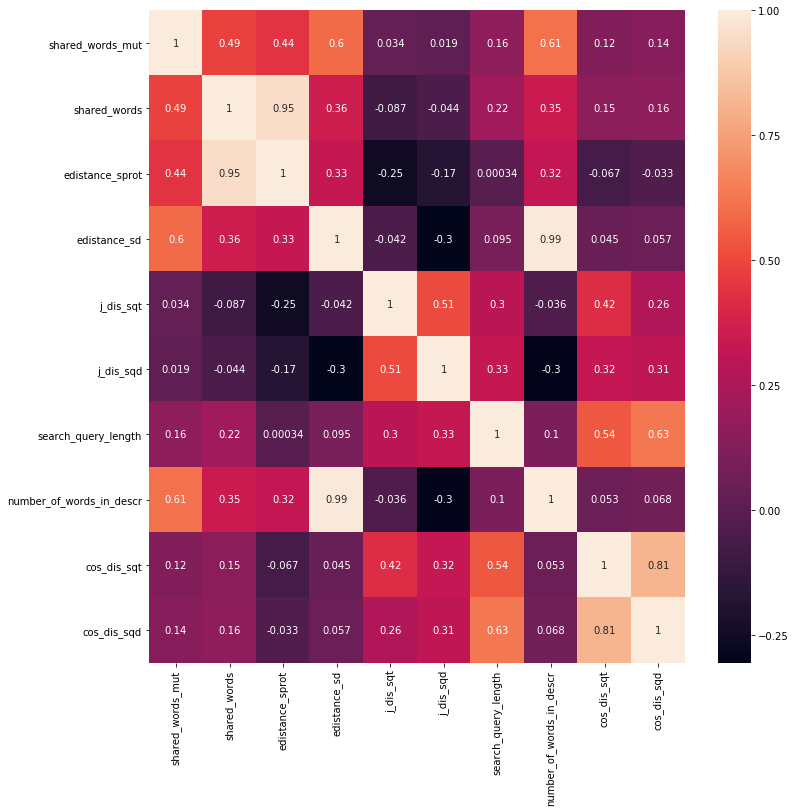

In [53]:
import seaborn as sns
plt.figure(figsize=(12, 12))
temp = testing_data.drop(['product_uid','id'],axis=1)
sns.heatmap(temp.corr(), annot=True)
plt.show()

C:\Users\vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


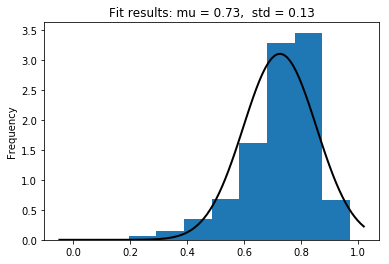

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm  

training_data.cos_dis_sqd.plot(kind='hist', normed=True)

mu, std = norm.fit(training_data.cos_dis_sqd)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

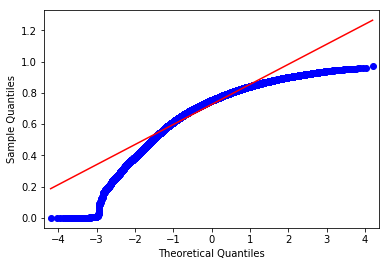

Statistics=0.909, p=0.000


C:\Users\vikas\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1310: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [55]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro


from matplotlib import pyplot
qqplot(training_data.cos_dis_sqd, line='s')
pyplot.show()

stat, p = shapiro(training_data.cos_dis_sqd)
print('Statistics=%.3f, p=%.3f' % (stat, p))

In [56]:
from scipy.stats import anderson

result = anderson(training_data.cos_dis_sqd)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 1513.473
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


C:\Users\vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


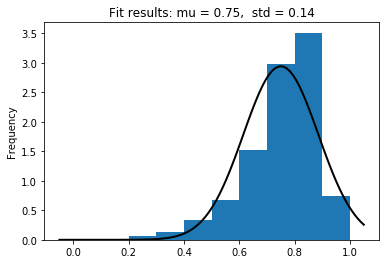

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm  

training_data.cos_dis_sqt.plot(kind='hist', normed=True)

mu, std = norm.fit(training_data.cos_dis_sqt)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

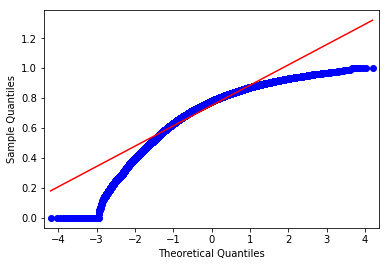

Statistics=0.903, p=0.000


C:\Users\vikas\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1310: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [58]:
from matplotlib import pyplot
qqplot(training_data.cos_dis_sqt, line='s')
pyplot.show()

stat, p = shapiro(training_data.cos_dis_sqt)
print('Statistics=%.3f, p=%.3f' % (stat, p))

C:\Users\vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


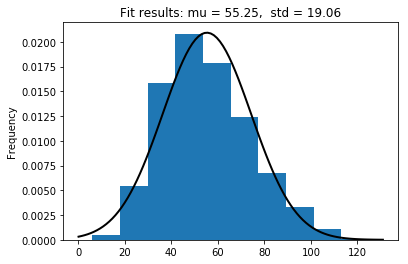

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm  

training_data.shared_words.plot(kind='hist', normed=True)

mu, std = norm.fit(training_data.shared_words)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

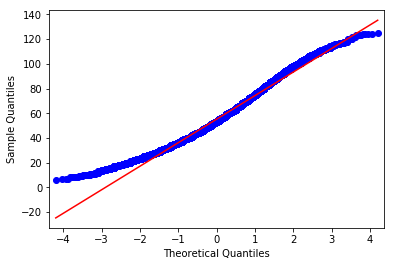

Statistics=0.983, p=0.000


C:\Users\vikas\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1310: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [60]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro


from matplotlib import pyplot
qqplot(training_data.shared_words, line='s')
pyplot.show()

stat, p = shapiro(training_data.shared_words)
print('Statistics=%.3f, p=%.3f' % (stat, p))

C:\Users\vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


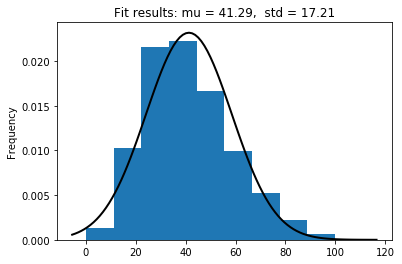

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm  

training_data.edistance_sprot.plot(kind='hist', normed=True)

mu, std = norm.fit(training_data.edistance_sprot)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

C:\Users\vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


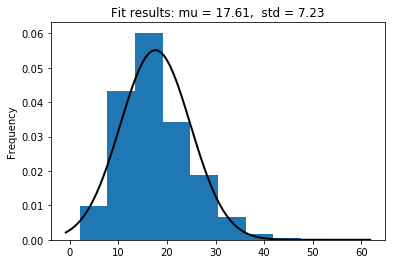

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm  

training_data.search_query_length.plot(kind='hist', normed=True)

mu, std = norm.fit(training_data.search_query_length)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [63]:
#testing set

C:\Users\vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


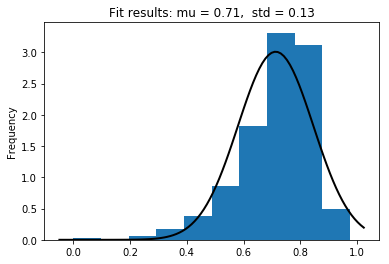

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm  

testing_data.cos_dis_sqd.plot(kind='hist', normed=True)

mu, std = norm.fit(testing_data.cos_dis_sqd)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

C:\Users\vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


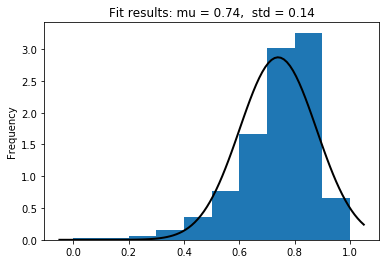

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm  

testing_data.cos_dis_sqt.plot(kind='hist', normed=True)

mu, std = norm.fit(testing_data.cos_dis_sqt)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()


C:\Users\vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


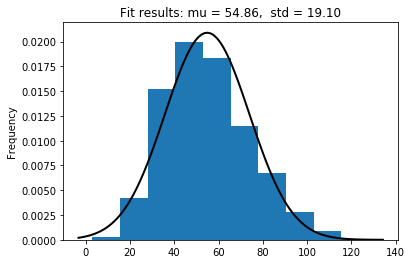

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm  

testing_data.shared_words.plot(kind='hist', normed=True)

mu, std = norm.fit(testing_data.shared_words)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

C:\Users\vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


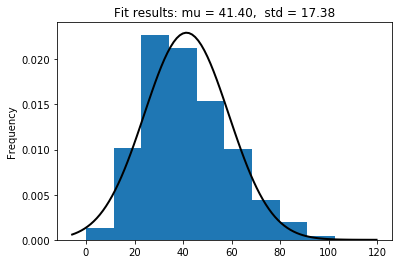

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm  

testing_data.edistance_sprot.plot(kind='hist', normed=True)

mu, std = norm.fit(testing_data.edistance_sprot)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

C:\Users\vikas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


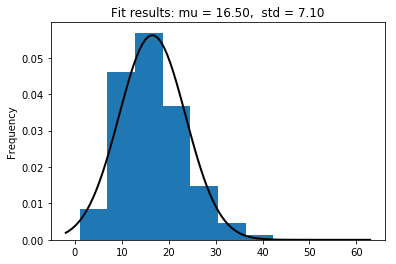

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm  

testing_data.search_query_length.plot(kind='hist', normed=True)

mu, std = norm.fit(testing_data.search_query_length)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

Text(0.5, 1.0, 'Training Data Pairs plot - Feature extraction')

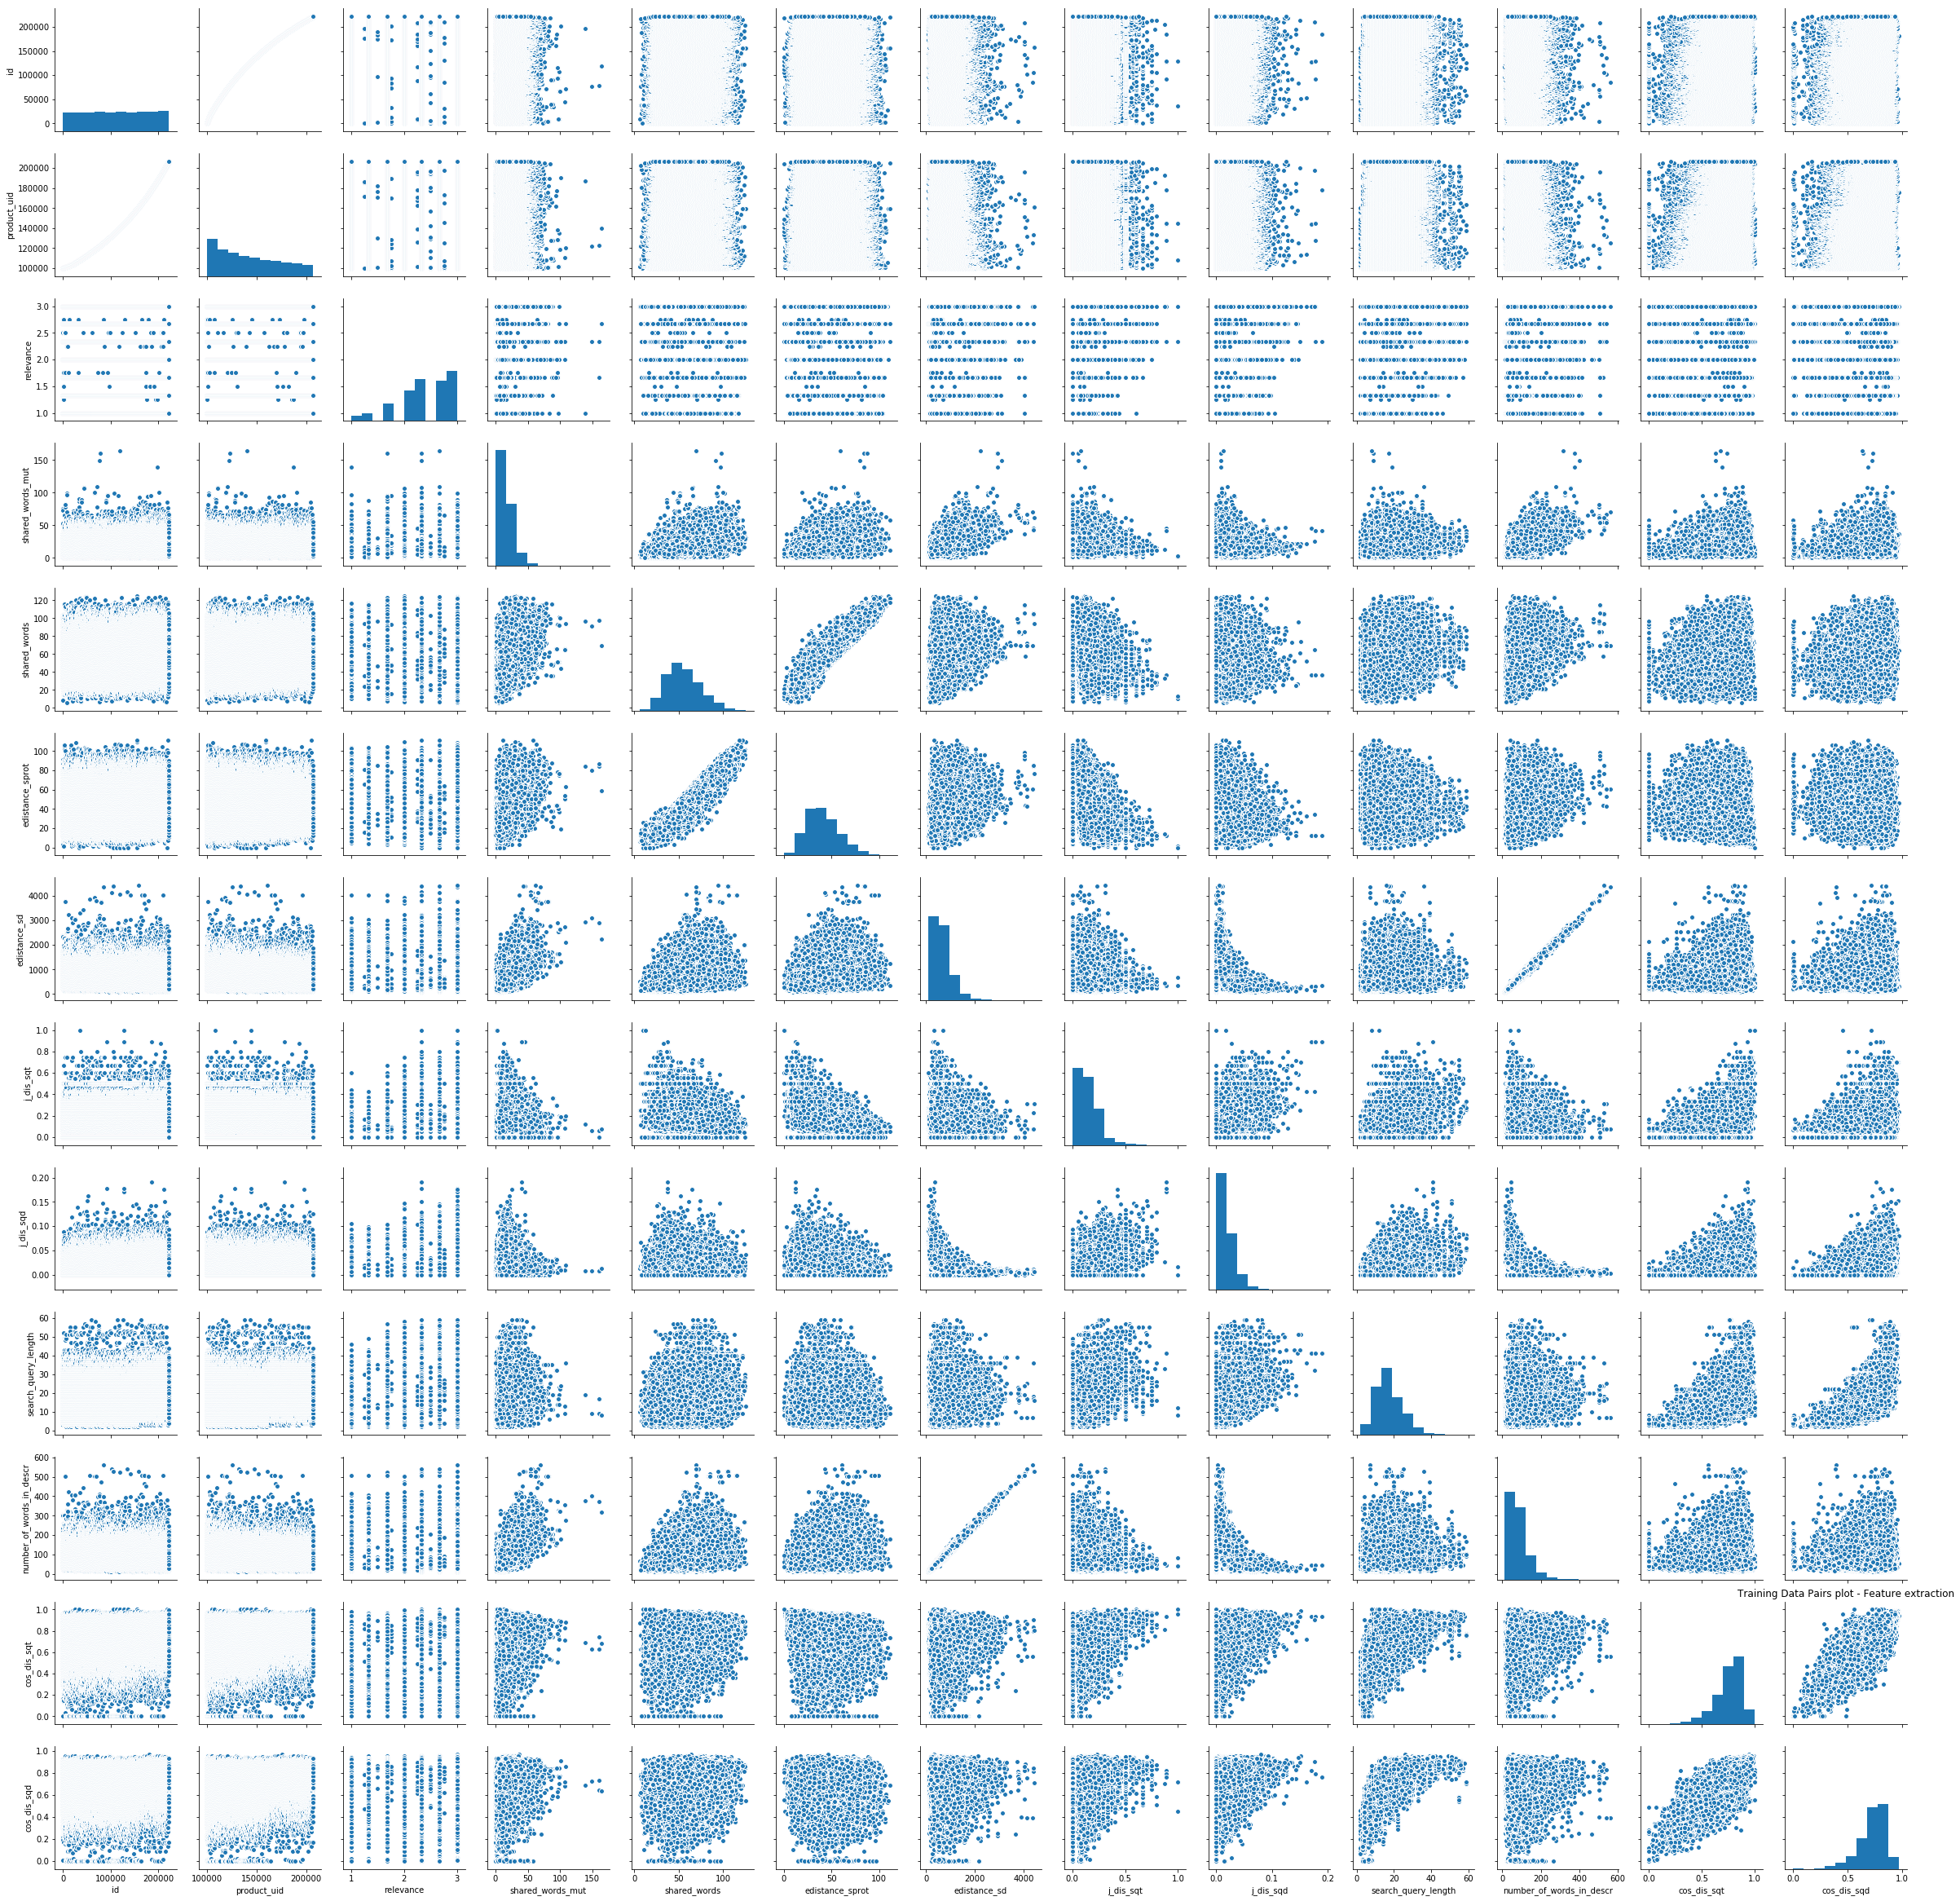

In [69]:
sns.pairplot(training_data)
plt.title('Training Data Pairs plot - Feature extraction')

Text(0.5, 1.0, 'Testing Data Pairs plot - Feature extraction')

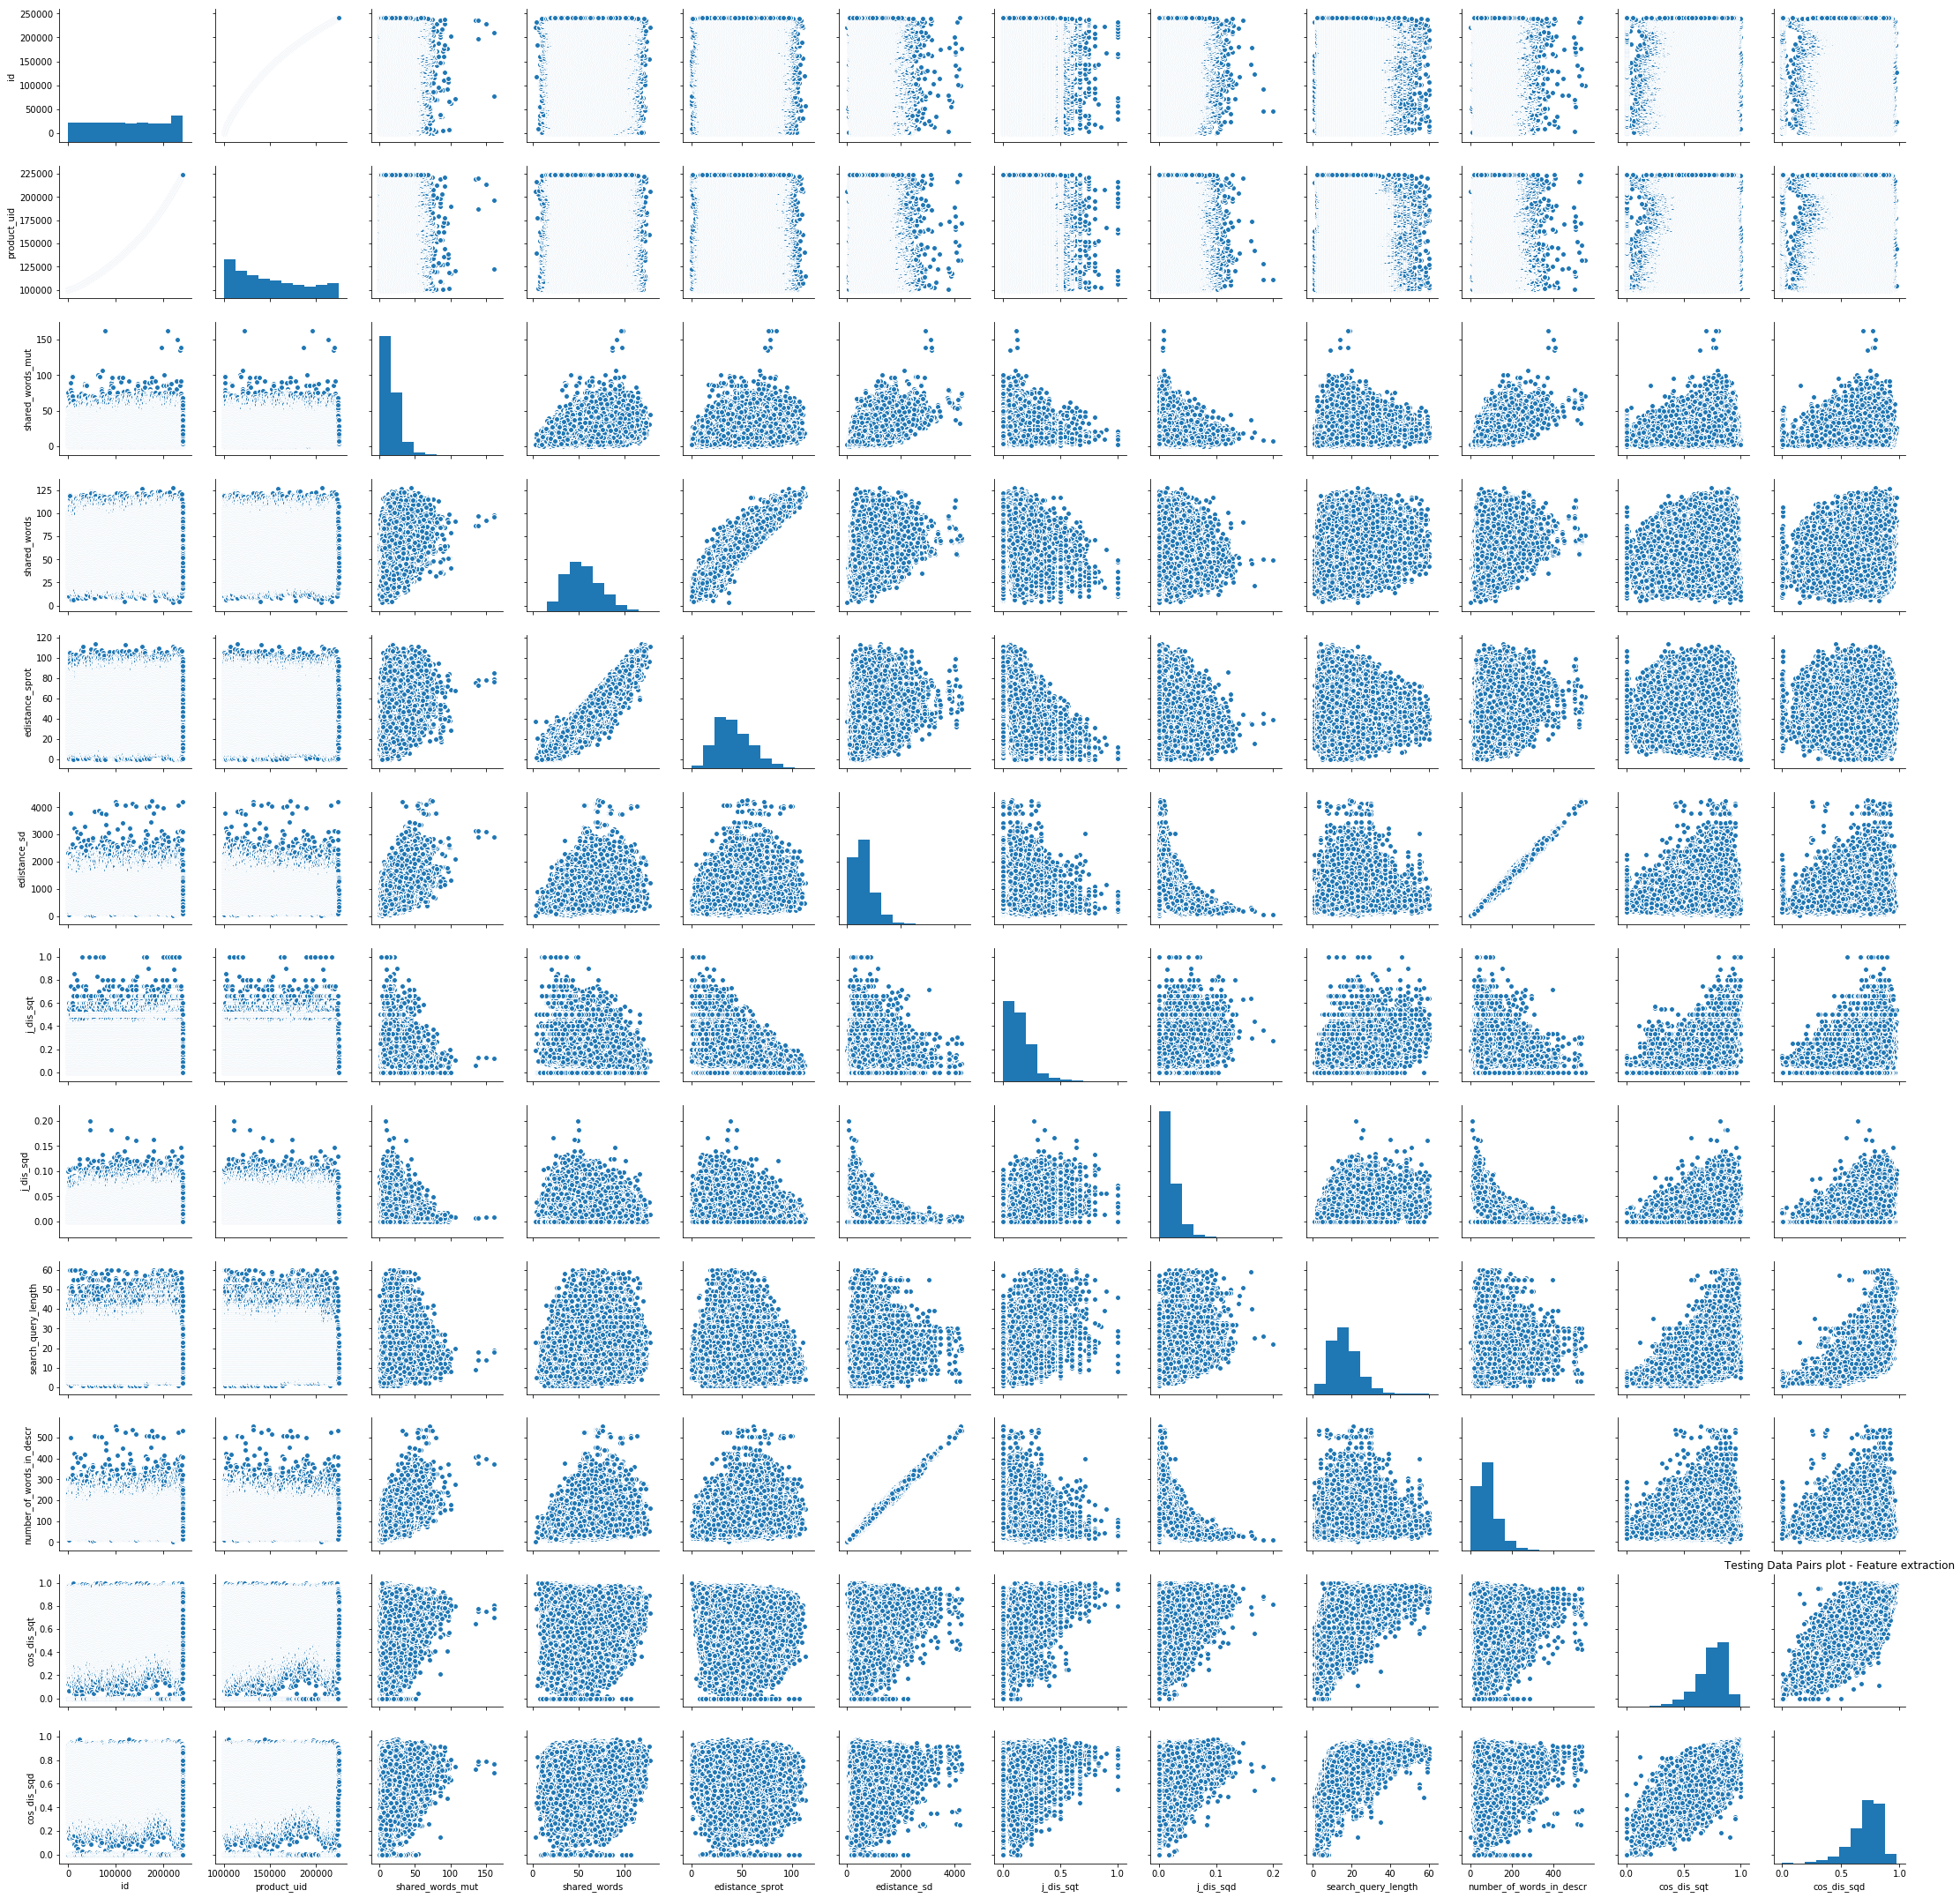

In [70]:
sns.pairplot(testing_data)
plt.title('Testing Data Pairs plot - Feature extraction')

Let's start machine learning
first of all let's create training and test data sets

We are going to apply the following models:

RandomForestRegressor
LinearRegression
GradientBoostingRegressor
BaggingRegressor
Chain model withing pipeline
XGBoost
CatBoost
Naive Baies
PolynomialFeatures for all previous algorithms
Plan
We are going to do the following:

Define pipeline
drop non numeric columns because these information has been already transformed to numberic
Apply the model which has been mentioned above within pipeline mode and outside pipeline
Train models and compare their result on test dataset
write a summary about it

In [71]:
df_training = training_data.drop(['product_title','search_term','product_description', 'product_title_tokens', 'product_description_tokens','product_title_tokens','search_term_tokens'],axis=1)

y_train = df_training['relevance'].values
X_train = df_training.drop(['id','relevance'],axis=1).values

In [72]:
df_training.head()

id  product_uid  relevance  shared_words_mut  shared_words  \
0   2       100001       3.00                 4            24   
1   3       100001       2.50                 3            24   
2   9       100002       3.00                21            62   
3  16       100005       2.33                15            56   
4  17       100005       2.67                17            57   

   edistance_sprot  edistance_sd  j_dis_sqt  j_dis_sqd  search_query_length  \
0               20           589   0.200000   0.000000                   12   
1               20           592   0.000000   0.000000                    9   
2               53           850   0.000000   0.000000                    9   
3               42           503   0.066667   0.012346                   16   
4               43           501   0.230769   0.025000                   18   

   number_of_words_in_descr  cos_dis_sqt  cos_dis_sqd  
0                        71     0.584761     0.667018  
1                        71     0.437595     0.635434  
2                       111     0.783244     0.700815  
3                        62     0.784465     0.824591  
4                        62     0.870930     0.892532

In [73]:
# X_test = testing_data.drop(['id','product_title','search_term','product_description'],axis=1).values
X_test = testing_data.drop(['id','product_title','search_term','product_description', 'product_title_tokens', 'product_description_tokens','product_title_tokens','search_term_tokens'],axis=1).values

id_test = testing_data['id']

RandomForestRegressor

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

rfr = RandomForestRegressor(n_estimators = 3, n_jobs = -1, random_state = 17, verbose = 1, criterion='mse')
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)
model=rfr.predict(X_train)
print(y_pred)

print("Number of predictions:",len(y_pred))

meanSquaredError=mean_squared_error(y_train, model)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)
pd.DataFrame({"id": id_test, "relevance": y_pred}).to_csv('submission.csv',index=False)

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.2s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished


[1.77666667 2.         2.33333333 ... 2.55666667 1.33333333 2.55333333]
Number of predictions: 166693
MSE: 0.08058902773877745
RMSE: 0.28388206660297766


Linear Regression

In [104]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs = -1)
model=lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

pd.DataFrame({"id": id_test, "relevance": y_pred}).to_csv('submission.csv',index=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)


In [77]:
import sklearn
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
                'loss' : ['ls'],
                'n_estimators' : [3], 
                'max_depth' : [9],
                'max_features' : ['auto'] 
             }

gbr = GradientBoostingRegressor()

model_gbr = sklearn.model_selection.GridSearchCV(estimator = gbr, n_jobs = -1, param_grid = param_grid)
model_gbr.fit(X_train, y_train)
print('Best CV Score:')
print(-model_gbr.best_score_)

y_pred = model_gbr.predict(X_test)

pd.DataFrame({"id": id_test, "relevance": y_pred}).to_csv('submission.csv',index=False)

Best CV Score:
-0.010852927402652757


In [105]:
#Naive Bayes
from sklearn.linear_model import BayesianRidge

gnb = BayesianRidge()
param_grid = {}
model_nb = sklearn.model_selection.GridSearchCV(estimator = gnb, param_grid = param_grid, n_jobs = -1)
model_nb.fit(X_train, y_train)

y_pred = model_nb.predict(X_test)
pd.DataFrame({"id": id_test, "relevance": y_pred}).to_csv('submission.csv',index=False)

In [79]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
param_grid = {'max_depth':[5, 6], 
              'n_estimators': [130, 150, 170], 
              'learning_rate' : [0.1]}
model_xgb = sklearn.model_selection.GridSearchCV(estimator = xgb, param_grid = param_grid, n_jobs = -1)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)
pd.DataFrame({"id": id_test, "relevance": y_pred}).to_csv('submission.csv',index=False)